# Introduction
This notebook aims at implementing logistic regression from geometric prespective. Please read [this blog](https://medium.com/analytics-vidhya/understanding-logistic-regression-the-geometric-way-6538012a4449) before you start.

Here is the derivative of geometric loss function w.r.t weights (w) and bias (b)

<img src= "https://i.imgur.com/pyRlyu4.png" height= "10px" weight= "10px">
<center><b>Derivative of geometric loss w.r.t weight</b></center>
This is what we will use to update the weights in each gradient descent step.

<img src= "https://i.imgur.com/IZSxD5o.png" height= "10px" weight= "10px">
<center><b>Derivative of geometric loss w.r.t bias</b></center>
This is what we will use to update the bias in each gradient descent step.

In [15]:
# %matplotlib notebook
import numpy as np
from sklearn import datasets
from collections import defaultdict
import pandas as pd
import seaborn as sns
from pandas.plotting import parallel_coordinates
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from scipy.special import expit
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

## Convert raw numpy data to pandas DataFrame (ease)

In [16]:
data = datasets.load_iris()
df_dict = defaultdict(list)
for i, v in enumerate(data.feature_names):
    df_dict[v] = data.data[:,i]
df = pd.DataFrame(df_dict)
df["label"] = data.target

## Best features that seperates all class (EDA, feature selection)

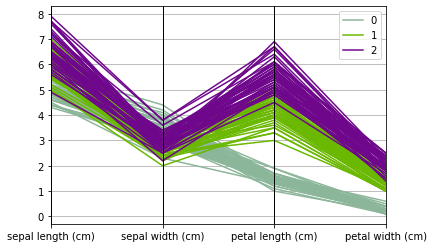

In [17]:
parallel_coordinates(df, class_column= "label")

## Best feature that seperates all 3 classes well is petal length, followed by petal width, Also you can see outlier in sepal width feature with is far away from the most of the point.

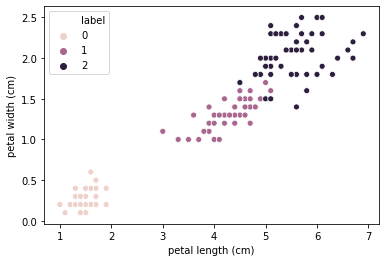

In [18]:
sns.scatterplot(x= "petal length (cm)", y= "petal width (cm)", hue= "label", data= df)

In [19]:
# for simplicity just taking 2 features and 2 classes
df = df[["petal length (cm)", "petal width (cm)", "label"]][:100]

For simplicity we are taking only 2 best features and only two classes (binary classification)

# Helper methods

In [20]:
# transform logits/ raw probability scores to actual probability scores
def sigmoid(logits):
    '''
    A logistic function to squash the values
    '''
    return 1 / (1 + expit(-logits))

#  loss function for logistic regression (log-loss/ cross entropy)
def geometric_loss(x, y_true, theta, bias, lambda_= 0.01):
    """
    Compute geometric loss for logistic regression
    """
    return np.mean(np.log(1 + expit(np.multiply(-y_true, x.dot(theta.T)) + bias)))

# computer gradient on each batch and update theta
def gradient_descent(x, y, X, Y, theta, bias, epochs= 1000, lr= 0.001):
    """
    Gradient descent to find best weights
    """
    
    # holds test loss per 100 epoch
    test_loss_list = []
    
    # weight 1
    w1 = theta[0][0]
    
    # weights 2
    w2 = theta[0][1]
    
    # for each epoch, compute gradient w.r.t bias and for each weights (parameters) and update the parameters
    for epoch in range(epochs):
        
        # derivate of geometric loss w.r.t bias (b)
        d_b = expit(bias)/ (expit(bias) + expit(theta.dot(x.T.dot(y))))
        
        # derivate of geometric loss w.r.t weight 1 (w1)
        d_w1 = -(expit(bias) * x[:,0].T.dot(y))/ (np.exp(x[:,0].dot(y) * w1) + expit(bias))
        
        # derivate of geometric loss w.r.t weight 2 (w2)
        d_w2 = -(expit(bias) * x[:,1].T.dot(y))/ (expit(x[:,1].dot(y) * w2) + expit(bias))
        
        # update bias
        bias -= lr * d_b
        
        # update weight 1
        theta[0][0] -= lr * d_w1
        
        # update weight 2
        theta[0][1] -= lr * d_w2
        
        if not epoch % 100:
            test_loss = geometric_loss(X,  np.array(Y, dtype= int).reshape(-1, 1), theta, bias, lr)
            test_loss_list.append(test_loss)
            print(f"Test set geometric loss at epoch {epoch} : {test_loss}")
    return theta, bias, test_loss_list

def predict(X, theta, bias):
    """
    Returns the prediction
    """
    #probability for each flower
    squash_list = sigmoid(X.dot(theta.T) + bias)
    # hard assign
    prediction_list = [1 if _ > 0.5 else -1 for _ in squash_list]
    # return predictions
    return np.array(prediction_list)

# Create logistic regression model using geometric loss function

In [37]:
'''
Preprocessing and training data
'''

# drop target column
x = df.drop(["label"], axis= 1).values
y = df.label.values

# uncomment to generate synthetic data
# x, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)

# number of features
m = x.shape[1]

# number of rows
n = x.shape[0]

'''
As we are dealing with distance based model, we should normalize the data
'''
for j in range(m):
    x[:, j] = (x[:, j] - x[:,j].mean())
print("Performed mean centering")

# initialize thetas/ parameters/ weights (+1 for bias term)
'''
theta = [[weight 1, weight 2]]
'''
theta = np.random.normal(size= (1, m))

# addition degree of freedom
bias = 1

'''
As this is geometric loss, it expects the labels to be 1 and -1 and not 0 and 1
'''
# label_list = df.label.apply(lambda x: -1 if x==0 else 1)

label_list = np.array([-1 if _== 0 else 1 for _ in y])

# train test split (20% for testing, rest for training)
x_train, X_test, y_train, Y_test = train_test_split(x,
                                                    label_list.reshape(-1, 1),
                                                    test_size= 0.2,
                                                    stratify= label_list,
                                                   random_state= 10)

# perform gradient descent
theta, bias, test_loss_list = gradient_descent(x_train, y_train, X_test, Y_test, theta, bias, lr =0.001)

Performed mean centering
Test set geometric loss at epoch 0 : 0.6148957223706248
Test set geometric loss at epoch 100 : 0.009751053245300663
Test set geometric loss at epoch 200 : 0.0008899895432521686
Test set geometric loss at epoch 300 : 7.204010002566575e-05
Test set geometric loss at epoch 400 : 5.747584079058647e-06
Test set geometric loss at epoch 500 : 4.597505549914911e-07
Test set geometric loss at epoch 600 : 3.6930916475103045e-08
Test set geometric loss at epoch 700 : 2.9798103540453164e-09
Test set geometric loss at epoch 800 : 2.4152745300938296e-10
Test set geometric loss at epoch 900 : 1.9668333624562465e-11


# Visualizing test loss per 100 epoch

Text(0.5, 1.0, 'Epoch Vs Loss')

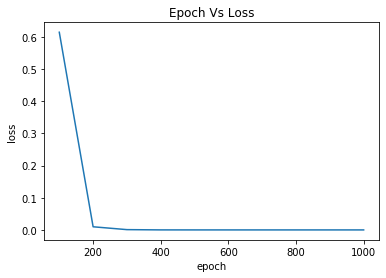

In [38]:
sns.lineplot([ 100 * idx for idx in range(1, len(test_loss_list) + 1)], test_loss_list)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Epoch Vs Loss")

## Test accuracy

In [39]:
# Predictions
prediction_list = predict(X_test, theta, bias)
print("Test Accuracy ", accuracy_score(Y_test, prediction_list) * 100 , '%')

Test Accuracy  100.0 %


# Visualizing decision boundary

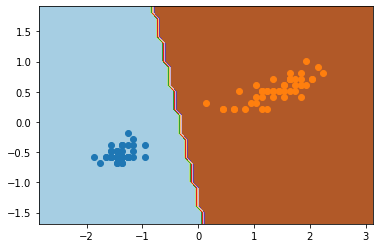

In [40]:
# decision surface for logistic regression on a binary classification dataset
# generate dataset
# define bounds of the domain
min1, max1 = x[:, 0].min()-1, x[:, 0].max()+1
min2, max2 = x[:, 1].min()-1, x[:, 1].max()+1
# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
# make predictions for the grid
yhat = predict(grid, theta, bias)
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(x[row_ix, 0], x[row_ix, 1], cmap='Paired')